In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This data comes from https://www.governing.com/archive/state-education-spending-per-pupil-data.html. It is the government census data for education spending in fiscal year 2016 (Oct 2015 - Sep 2016)

In [2]:
states = pd.read_csv('./data/state_spending_per_student.csv')
states.head()

,State,Total Per Pupil Spending,Total Spending (in Ks),Instruction Spending Per Pupil,Instruction Spending (in Ks),Support Services Per Pupil,Support Services (in Ks)
0,Alabama,"$9,236","$6,907,539","$5,257","$3,865,453","$3,321","$2,439,634"
1,Alaska,"$17,510","$2,327,151","$9,449","$1,251,738","$7,427","$983,877"
2,Arizona,"$7,613","$7,276,067","$4,077","$3,872,250","$3,105","$2,913,176"
3,Arkansas,"$9,846","$4,750,938","$5,539","$2,658,253","$3,762","$1,802,769"
4,California,"$11,495","$72,641,244","$6,849","$42,587,272","$4,191","$26,058,021"


In [3]:
def dollar_to_float(dollar: str) -> float:
    return float(dollar.replace(',', '')[1:])

In [4]:
states['Total Per Pupil Spending'] = states['Total Per Pupil Spending'].apply(dollar_to_float)

In [5]:
pps = states[['State', 'Total Per Pupil Spending']]
pps.sort_values('Total Per Pupil Spending', ascending=False)

,State,Total Per Pupil Spending
32,New York,22366.0
8,District of Columbia,19159.0
6,Connecticut,18958.0
30,New Jersey,18402.0
45,Vermont,17873.0
1,Alaska,17510.0
50,Wyoming,16442.0
21,Massachusetts,15593.0
39,Rhode Island,15532.0
38,Pennsylvania,15418.0


This data comes from https://www2.ed.gov/about/inits/ed/edfacts/data-files/index.html.

In [6]:
reading_levels = pd.read_csv('./data/rla-achievement-lea-sy2015-16.csv')
reading_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16238 entries, 0 to 16237
Columns: 229 entries, STNAM to MIG_RLAHSPCTPROF_1516
dtypes: int64(3), object(226)
memory usage: 28.4+ MB


C:\Users\evarv\AppData\Local\Temp\ipykernel_19700\4199286999.py:1: DtypeWarning: Columns (17,45,129,143) have mixed types. Specify dtype option on import or set low_memory=False.
  reading_levels = pd.read_csv('./data/rla-achievement-lea-sy2015-16.csv')


In [7]:
cols = []

for col in reading_levels.columns:
    if ('PCTPROF' in col) and (col[:3] == 'ALL'):
        cols.append(col)

In [8]:
levels_summary = reading_levels[['STNAM', 'LEAID'] + cols]

In [9]:
levels_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16238 entries, 0 to 16237
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   STNAM                  16238 non-null  object
 1   LEAID                  16238 non-null  int64 
 2   ALL_RLA00PCTPROF_1516  16238 non-null  object
 3   ALL_RLA03PCTPROF_1516  14751 non-null  object
 4   ALL_RLA04PCTPROF_1516  14713 non-null  object
 5   ALL_RLA05PCTPROF_1516  14737 non-null  object
 6   ALL_RLA06PCTPROF_1516  14756 non-null  object
 7   ALL_RLA07PCTPROF_1516  14356 non-null  object
 8   ALL_RLA08PCTPROF_1516  14279 non-null  object
 9   ALL_RLAHSPCTPROF_1516  12420 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


The following education data can be found on https://www2.ed.gov/about/inits/ed/edfacts/data-files/index.html.

In [10]:
math_levels = pd.read_csv('./data/math-achievement-lea-sy2015-16.csv')

C:\Users\evarv\AppData\Local\Temp\ipykernel_19700\3648170517.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  math_levels = pd.read_csv('./data/math-achievement-lea-sy2015-16.csv')


In [11]:
cols = []

for col in math_levels.columns:
    if ('PCTPROF' in col) and (col[:3] == 'ALL'):
        cols.append(col)

In [12]:
levels_summary = pd.merge(left=levels_summary, right=math_levels[['STNAM', 'LEAID'] + cols])

In [13]:
levels_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16222 entries, 0 to 16221
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   STNAM                  16222 non-null  object
 1   LEAID                  16222 non-null  int64 
 2   ALL_RLA00PCTPROF_1516  16222 non-null  object
 3   ALL_RLA03PCTPROF_1516  14750 non-null  object
 4   ALL_RLA04PCTPROF_1516  14712 non-null  object
 5   ALL_RLA05PCTPROF_1516  14736 non-null  object
 6   ALL_RLA06PCTPROF_1516  14755 non-null  object
 7   ALL_RLA07PCTPROF_1516  14355 non-null  object
 8   ALL_RLA08PCTPROF_1516  14277 non-null  object
 9   ALL_RLAHSPCTPROF_1516  12405 non-null  object
 10  ALL_MTH00PCTPROF_1516  16222 non-null  object
 11  ALL_MTH03PCTPROF_1516  14749 non-null  object
 12  ALL_MTH04PCTPROF_1516  14712 non-null  object
 13  ALL_MTH05PCTPROF_1516  14736 non-null  object
 14  ALL_MTH06PCTPROF_1516  14753 non-null  object
 15  ALL_MTH07PCTPROF_15

In [14]:
overall_levels = levels_summary[['STNAM', 'ALL_RLA00PCTPROF_1516', 'ALL_MTH00PCTPROF_1516']].dropna()

In [15]:
overall_levels.head()

,STNAM,ALL_RLA00PCTPROF_1516,ALL_MTH00PCTPROF_1516
0,ALABAMA,33,42
1,ALABAMA,33,39
2,ALABAMA,58,66
3,ALABAMA,67,72
4,ALABAMA,33,37


In [16]:
def score_to_float(score: str):
    if '-' in score:
        min_score, max_score = score.split('-')
        return (float(min_score) + float(max_score)) / 2
    elif not str.isalpha(score[0]):
        return float(score)
    elif score[:2] == 'GE' or score[:2] == 'GT':
        return (float(score[2:]) + 100) / 2
    elif score[:2] == 'LE' or score[:2] == 'LT':
        return (float(score[2:]) / 2)
    else:
        return np.nan

In [17]:
overall_levels['avg_reading_score'] = overall_levels['ALL_RLA00PCTPROF_1516'].apply(score_to_float)

In [18]:
overall_levels['avg_math_score'] = overall_levels['ALL_MTH00PCTPROF_1516'].apply(score_to_float)

In [19]:
mean_state_reading_scores = overall_levels.groupby('STNAM')['avg_reading_score'].mean()
mean_state_math_scores = overall_levels.groupby('STNAM')['avg_math_score'].mean()

In [20]:
msms = np.array(mean_state_math_scores.drop(['BUREAU OF INDIAN AFFAIRS', 'PUERTO RICO', 'VIRGIN ISLANDS']))
pps = pps.drop(1)
pps['math_scores'] = msms

In [21]:
msrs = np.array(mean_state_reading_scores.drop(['BUREAU OF INDIAN AFFAIRS', 'PUERTO RICO', 'VIRGIN ISLANDS']))
pps['reading_scores'] = msrs

(0.0, 100.0)

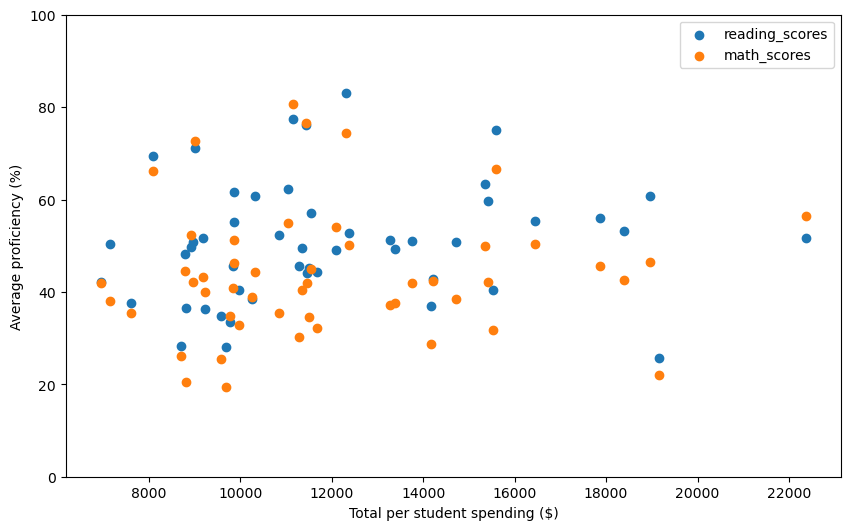

In [22]:
plt.figure(figsize=(10,6))

plt.scatter('Total Per Pupil Spending', 'reading_scores', data=pps)
plt.scatter('Total Per Pupil Spending', 'math_scores', data=pps)

plt.ylabel('Average proficiency (%)')
plt.xlabel('Total per student spending ($)')

plt.legend()
# plt.xlim(left=0)
plt.ylim(0, 100)

In [23]:
pps[['Total Per Pupil Spending', 'reading_scores', 'math_scores']].corr()

,Total Per Pupil Spending,reading_scores,math_scores
Total Per Pupil Spending,1.000000,0.130555,0.064105
reading_scores,0.130555,1.000000,0.896520
math_scores,0.064105,0.896520,1.000000


In [24]:
from sklearn.linear_model import LinearRegression

math_slr = LinearRegression()

math_slr.fit(pps[['Total Per Pupil Spending']].values, pps['math_scores'].values)


LinearRegression()

In [25]:
print(f"Math score procifiency (%) ~ {math_slr.intercept_} + {math_slr.coef_[0] * 10000} * $10000 of per-pupil spending")

Math score procifiency (%) ~ 40.65945020202182 + 2.5941970674645036 * $10000 of per-pupil spending


In [26]:
reading_slr = LinearRegression()

reading_slr.fit(pps[['Total Per Pupil Spending']].values, pps['reading_scores'].values)

print(f"Reading score proficiency (%) ~ {reading_slr.intercept_} + {reading_slr.coef_[0] * 10000} * $10000 of per-pupil spending")

Reading score proficiency (%) ~ 44.75373292743498 + 4.926932716962559 * $10000 of per-pupil spending
